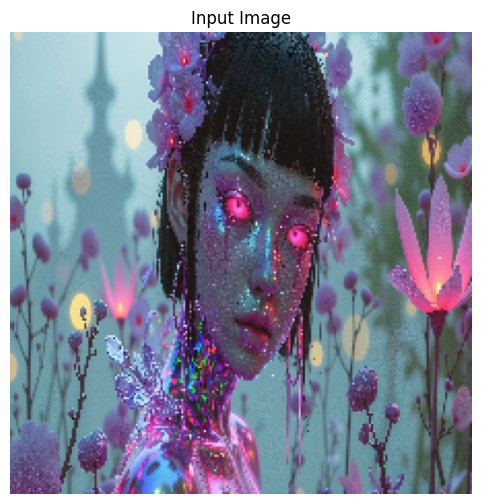

Prediction : AI_GENERATED
Confidence : 0.9762
Details    : AI_GENERATED=0.9762 | NON_AI_GENERATED=0.0238


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

MODEL_PATH = "best_tl_phase2.keras"
IMG_PATH   = "4.jpg"
IMG_SIZE   = (224, 224)
THRESH     = 0.5

model = load_model(MODEL_PATH)

# tampilkan gambar
img = image.load_img(IMG_PATH, target_size=IMG_SIZE)
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# preprocess 
x = image.img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)

# sigmoid output = P(NON_AI_GENERATED) 
predict_non_ai = float(model.predict(x, verbose=0)[0][0])
predict_ai = 1.0 - predict_non_ai

# keputusan
if predict_non_ai >= THRESH:
    pred_label = "NON_AI_GENERATED"
    confidence = predict_non_ai
else:
    pred_label = "AI_GENERATED"
    confidence = predict_ai

print("Prediction :", pred_label)
print("Confidence :", f"{confidence:.4f}")
print(f"Details    : AI_GENERATED={predict_ai:.4f} | NON_AI_GENERATED={predict_non_ai:.4f}")

